In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
dfwellpf12 = pd.read_csv('Final PF-12 and Injection.csv',index_col=0,parse_dates=True)


In [4]:
df = dfwellpf12[['BORE_OIL_VOL']]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3305 entries, 2007-09-01 to 2016-09-17
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BORE_OIL_VOL  3305 non-null   float64
dtypes: float64(1)
memory usage: 51.6 KB


<AxesSubplot:xlabel='DATEPRD'>

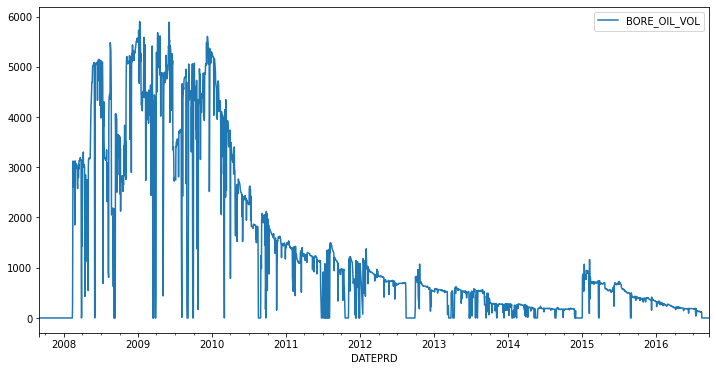

In [11]:
df.plot(figsize=(12,6))

In [43]:
dfrolling = df.rolling('15D').mean()

<AxesSubplot:xlabel='DATEPRD'>

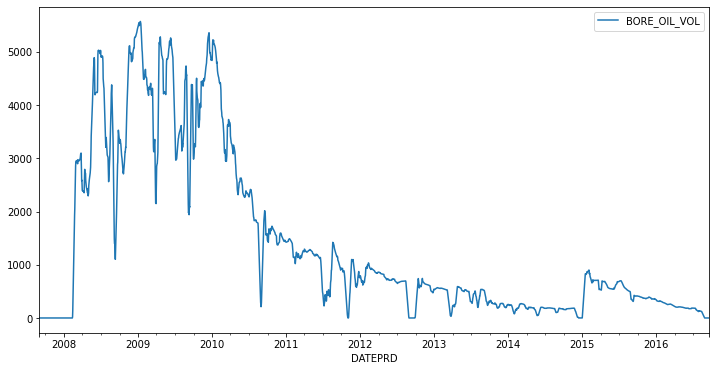

In [44]:
dfrolling.plot(figsize=(12,6))

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3305 entries, 2007-09-01 to 2016-09-17
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BORE_OIL_VOL  3305 non-null   float64
dtypes: float64(1)
memory usage: 51.6 KB


In [18]:
dfrolling

,BORE_OIL_VOL
DATEPRD,
2007-09-01,0.0
2007-09-02,0.0
2007-09-03,0.0
2007-09-04,0.0
2007-09-05,0.0
...,...
2016-09-13,0.0
2016-09-14,0.0
2016-09-15,0.0


In [45]:
dfresample = df.resample('15D').mean()

In [46]:
dfresample

,BORE_OIL_VOL
DATEPRD,
2007-09-01,0.000000
2007-09-16,0.000000
2007-10-01,0.000000
2007-10-16,0.000000
2007-10-31,0.000000
...,...
2016-07-15,128.133333
2016-07-30,113.866667
2016-08-14,0.000000


<AxesSubplot:xlabel='DATEPRD'>

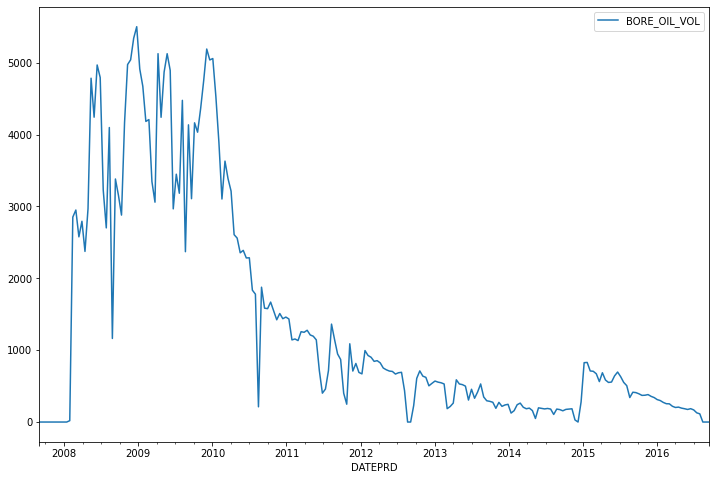

In [47]:
dfresample.plot(figsize=(12,8))

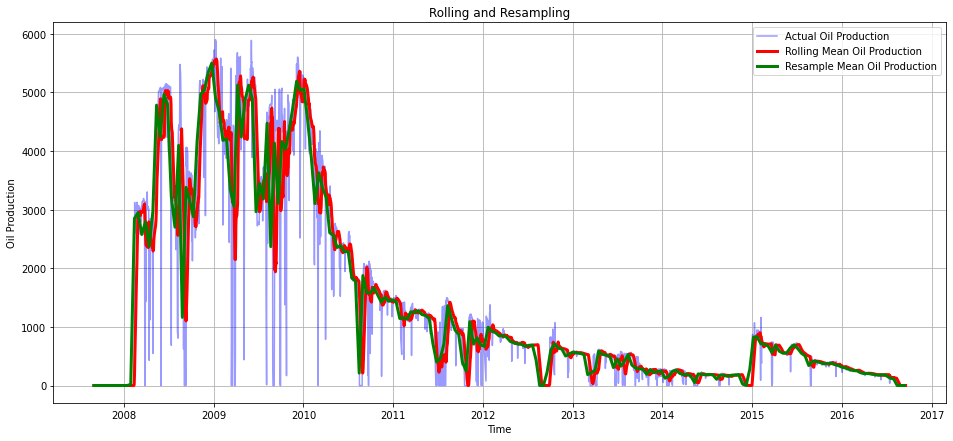

In [50]:
plt.figure(figsize=(16,7))
plt.grid()
plt.plot(df.index,df['BORE_OIL_VOL'],label = 'Actual Oil Production',c = 'blue',alpha = 0.4)
plt.plot(dfrolling.index,dfrolling['BORE_OIL_VOL'],label = 'Rolling Mean Oil Production',c = 'red',alpha = 1, lw = 3)
plt.plot(dfresample.index,dfresample['BORE_OIL_VOL'],label = 'Resample Mean Oil Production',c = 'green',alpha = 1, lw = 3)
plt.xlabel('Time')
plt.ylabel('Oil Production')
plt.title('Rolling and Resampling')
plt.legend()